# 3. Company-Wide Budgeting

In [1]:
import gurobipy as gp
from gurobipy import GRB
from math import sqrt
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import time
pd.set_option('display.max_row', None)

In [2]:
########################################
########### IMPORT DATA ################
########################################

# Import drug data using pandas
data = pd.read_csv('drugs.csv', index_col=0)
projects = data.columns
t_area = data.iloc[0]
ttm = data.iloc[1]
ret = data.iloc[2]
cost = data.iloc[3]

#import covariance matrix
cov=pd.read_csv('drugs_cov.csv', index_col=0)

#therapeutic areas
ther=[
"Oncology", "Cardiovascular", "Respiratory and dermatology", "Transplantation",
"Rheumatology and hormone therapy", "Central nervous system", "Ophtalmics"]

#budget constraints for therapeutic areas
t_bud={"Oncology": 100,
       "Cardiovascular": 200,
       "Respiratory and dermatology": 150,
       "Transplantation": 100,
       "Rheumatology and hormone therapy": 300,
       "Central nervous system": 100,
       "Ophtalmics": 50}

interest_rate=0.03

# 3.1 Risk Neutral Case of Company-Wide Budget Model
## Compare the company-wide budget model with the department-wide budget model
### (1) Risk neutral case of the company-wide budget model 

In [3]:
########################################
########### MODEL ######################
########################################

# Create an empty model
m = gp.Model('portfolio')

# ADD DECISION VARIABLES HERE
vars = pd.Series(m.addVars(projects, vtype=GRB.BINARY, name="projects"))

########################################
#### CONSTRAINTS & OBJ FUNCTIONS #######
########################################

# ADD CONSTRAINTS HERE

# Maximum Budget 
m.addConstr(vars.T @ cost <= 1000)


# Pipeline Constraints
m.addConstr(sum(vars[t] for t in range(len(projects)) if ttm[t] in ["1"]) >= 0.15*sum(vars[t] for t in range(len(projects))))
m.addConstr(sum(vars[t] for t in range(len(projects)) if ttm[t] in ["2", "3"]) >= 0.2*sum(vars[t] for t in range(len(projects))))
m.addConstr(sum(vars[t] for t in range(len(projects)) if ttm[t] in ["4", "5"]) >= 0.25*sum(vars[t] for t in range(len(projects))))


# ADD OBJECTIVE FUNCTION HERE
obj = ret.T @ vars + (1000-(cost.T @ vars))*(1+interest_rate)
m.setObjective(obj, GRB.MAXIMIZE)

m.setParam('OutputFlag', 0)
m.optimize()

# ADD PRINTING HERE:
# Print optimal value of the objective function
print('\nValue of objective function \nExpected Return: \n$%g' % m.objVal,"(Million)")

# Print optimal values for the decision variables
print('\nDecision variables \nSelected Projects:\n')
for v in m.getVars():
    if v.x >= 0.5:
        print('%s = %g' % (v.varName, v.x))

# Print the number of funded projects
temp=0
for v in m.getVars():
    if v.x>0.5:
        temp=temp+1
print('\nNumber of selected projects:', temp)

# Print total cost (buget spent on projects)
total_cost = round((vars.T @ cost).getValue(), 4)
print('\nTotal cost: $%g' % total_cost , "(Million)")

# Print the proportion of the budget spent on projects
print('\nPercent of the overall budget used for drug development:\n', round(total_cost/10, 4), "%")

# Print the portfolio variance when maximizing return  
portfolio_stdDev = sqrt((np.dot(np.dot(vars.T, cov), vars)).getValue())
print("\nPortfolio standard deviation when maximizing return:", round(portfolio_stdDev,4))


--------------------------------------------
--------------------------------------------

Academic license - for non-commercial use only - expires 2021-12-04
Using license file /Users/alex/gurobi.lic

Value of objective function 
Expected Return: 
$24675.3 (Million)

Decision variables 
Selected Projects:

projects[3] = 1
projects[4] = 1
projects[5] = 1
projects[6] = 1
projects[11] = 1
projects[13] = 1
projects[16] = 1
projects[17] = 1
projects[18] = 1
projects[20] = 1
projects[21] = 1
projects[22] = 1
projects[24] = 1
projects[25] = 1
projects[26] = 1
projects[27] = 1
projects[28] = 1
projects[30] = 1
projects[39] = 1
projects[40] = 1
projects[42] = 1
projects[43] = 1
projects[44] = 1
projects[47] = 1
projects[48] = 1
projects[50] = 1
projects[53] = 1
projects[57] = 1
projects[58] = 1
projects[62] = 1
projects[66] = 1
projects[68] = 1
projects[69] = 1
projects[72] = 1
projects[73] = 1
projects[74] = 1
projects[75] = 1
projects[76] = 1
projects[77] = 1
projects[78] = 1
projects[86] =

### (2) Risk neutral case of the department-wide budget model 

In [11]:
########################################
########### MODEL ######################
########################################

# Create an empty model
m2 = gp.Model('portfolio')

# ADD DECISION VARIABLES HERE
vars2 = pd.Series(m2.addVars(projects, vtype=GRB.BINARY, name="projects"))

########################################
#### CONSTRAINTS & OBJ FUNCTIONS #######
########################################

# ADD CONSTRAINTS HERE

# Maximum Cost by Therapeutic Area
m2.addConstr(sum(vars2[i]*cost[i] for i in range(len(t_area)) if t_area[i] == "Oncology") <= 100)
m2.addConstr(sum(vars2[i]*cost[i] for i in range(len(t_area)) if t_area[i] == 'Cardiovascular') <= 200)
m2.addConstr(sum(vars2[i]*cost[i] for i in range(len(t_area)) if t_area[i] == 'Respiratory and dermatology') <= 150)
m2.addConstr(sum(vars2[i]*cost[i] for i in range(len(t_area)) if t_area[i] == 'Transplantation') <= 100)
m2.addConstr(sum(vars2[i]*cost[i] for i in range(len(t_area)) if t_area[i] == 'Rheumatology and hormone therapy') <= 300)
m2.addConstr(sum(vars2[i]*cost[i] for i in range(len(t_area)) if t_area[i] == 'Central nervous system') <= 100)
m2.addConstr(sum(vars2[i]*cost[i] for i in range(len(t_area)) if t_area[i] == 'Ophtalmics') <= 50)


# Pipeline Constraints
m2.addConstr(sum(vars2[t] for t in range(len(projects)) if ttm[t] in ["1"]) >= 0.15*sum(vars2[t] for t in range(len(projects))))
m2.addConstr(sum(vars2[t] for t in range(len(projects)) if ttm[t] in ["2", "3"]) >= 0.2*sum(vars2[t] for t in range(len(projects))))
m2.addConstr(sum(vars2[t] for t in range(len(projects)) if ttm[t] in ["4", "5"]) >= 0.25*sum(vars2[t] for t in range(len(projects))))


# ADD OBJECTIVE FUNCTION HERE
obj2 = ret.T @ vars2 + (1000-(cost.T @ vars2))*(1+interest_rate)
m2.setObjective(obj2, GRB.MAXIMIZE)

m2.setParam('OutputFlag', 0)
m2.optimize()

# ADD PRINTING HERE:
# Print optimal value of the objective function
print('\nValue of objective function \nExpected Return: \n$%g' % m2.objVal,"(Million)")

# Print optimal values for the decision variables
print('\nDecision variables \nSelected Projects:\n')
for v in m2.getVars():
    if v.x >= 0.5:
        print('%s = %g' % (v.varName, v.x))

# Print the number of funded projects
temp2=0
for v in m2.getVars():
    if v.x>0.5:
        temp2=temp2+1
print('\nNumber of selected projects:', temp2)

# Print total cost (buget spent on projects)
total_cost2 = round((vars2.T @ cost).getValue(), 4)
print('\nTotal cost: $%g' % total_cost2 , "(Million)")

# Print the proportion of the budget spent on projects
print('\nPercent of the overall budget used for drug development:\n', round(total_cost2/10, 4), "%")

# Print the portfolio variance when maximizing return  
portfolio_stdDev2 = sqrt((np.dot(np.dot(vars2.T, cov), vars2)).getValue())
print("\nPortfolio standard deviation when maximizing return:", round(portfolio_stdDev2,4))


Value of objective function 
Expected Return: 
$23142.1 (Million)

Decision variables 
Selected Projects:

projects[3] = 1
projects[4] = 1
projects[6] = 1
projects[13] = 1
projects[15] = 1
projects[17] = 1
projects[18] = 1
projects[20] = 1
projects[21] = 1
projects[22] = 1
projects[24] = 1
projects[25] = 1
projects[27] = 1
projects[28] = 1
projects[29] = 1
projects[30] = 1
projects[39] = 1
projects[40] = 1
projects[42] = 1
projects[43] = 1
projects[44] = 1
projects[47] = 1
projects[48] = 1
projects[50] = 1
projects[57] = 1
projects[58] = 1
projects[62] = 1
projects[66] = 1
projects[69] = 1
projects[72] = 1
projects[76] = 1
projects[77] = 1
projects[78] = 1
projects[86] = 1
projects[91] = 1
projects[98] = 1
projects[99] = 1
projects[101] = 1
projects[102] = 1
projects[104] = 1
projects[105] = 1
projects[106] = 1
projects[109] = 1
projects[110] = 1
projects[111] = 1
projects[112] = 1

Number of selected projects: 46

Total cost: $874.48 (Million)

Percent of the overall budget used for 

# 3.2 Efficient Frontier

##  Compare the efficient frontier of the company-wide budget model with the department-wide budget model

### (1) Efficient Frontier of the company-wide budget model

In [12]:
def frontier_companyWide():
    
    ret_std_CW = {"CW_return":[], "CW_stdDev":[]}
    max_var = sum(cov.sum())
    
    for varConstr in np.linspace(0, max_var, 100):
        # an empty model
        m = gp.Model('portfolio')

        # Decision variables
        vars = pd.Series(m.addVars(projects, vtype=GRB.BINARY, name="projects"))
        
        # Maximum Budget 
        m.addConstr(vars.T @ cost <= 1000)
        
        # Pipeline Constraints
        m.addConstr(sum(vars[t] for t in range(len(projects)) if ttm[t] in ["1"]) >= 0.15*sum(vars[t] for t in range(len(projects))))
        m.addConstr(sum(vars[t] for t in range(len(projects)) if ttm[t] in ["2","3"]) >= 0.2*sum(vars[t] for t in range(len(projects))))
        m.addConstr(sum(vars[t] for t in range(len(projects)) if ttm[t] in ["4","5"]) >= 0.25*sum(vars[t] for t in range(len(projects))))
   
        
        # Constraint for variance
        portfolio_var = np.dot(np.dot(vars.T, cov), vars)
        m.addConstr(portfolio_var <= varConstr)

        # Objective function
        obj = ret.T @ vars + (1000-(cost.T @ vars))*(1+interest_rate)
        m.setObjective(obj, GRB.MAXIMIZE)
        
        # Find Solution
        m.setParam('OutputFlag', 0)
        m.optimize()

        # Put the optimized return and the corresponding standard deviation in the dictionary
        ret_std_CW["CW_return"].append(round(m.objVal, 3))
        ret_std_CW["CW_stdDev"].append(round(sqrt(portfolio_var.getValue()),3))
        
    return ret_std_CW

### (2) Efficient Frontier of the department-wide budget model

In [13]:
def frontier_deptWide():
    
    ret_std_DW = {"DW_return":[], "DW_stdDev":[]}
    max_var = sum(cov.sum())
    
    for varConstr in np.linspace(0, max_var, 100):
        # an empty model
        m2 = gp.Model('portfolio')

        # Decision variables
        vars2 = pd.Series(m2.addVars(projects, vtype=GRB.BINARY, name="projects"))
        
        # Maximum Budget 
        m2.addConstr(sum(vars2[i]*cost[i] for i in range(len(t_area)) if t_area[i] == "Oncology") <= 100)
        m2.addConstr(sum(vars2[i]*cost[i] for i in range(len(t_area)) if t_area[i] == 'Cardiovascular') <= 200)
        m2.addConstr(sum(vars2[i]*cost[i] for i in range(len(t_area)) if t_area[i] == 'Respiratory and dermatology') <= 150)
        m2.addConstr(sum(vars2[i]*cost[i] for i in range(len(t_area)) if t_area[i] == 'Transplantation') <= 100)
        m2.addConstr(sum(vars2[i]*cost[i] for i in range(len(t_area)) if t_area[i] == 'Rheumatology and hormone therapy') <= 300)
        m2.addConstr(sum(vars2[i]*cost[i] for i in range(len(t_area)) if t_area[i] == 'Central nervous system') <= 100)
        m2.addConstr(sum(vars2[i]*cost[i] for i in range(len(t_area)) if t_area[i] == 'Ophtalmics') <= 50)
        
        # Pipeline Constraints
        m2.addConstr(sum(vars2[t] for t in range(len(projects)) if ttm[t] in ["1"]) >= 0.15*sum(vars2[t] for t in range(len(projects))))
        m2.addConstr(sum(vars2[t] for t in range(len(projects)) if ttm[t] in ["2","3"]) >= 0.2*sum(vars2[t] for t in range(len(projects))))
        m2.addConstr(sum(vars2[t] for t in range(len(projects)) if ttm[t] in ["4","5"]) >= 0.25*sum(vars2[t] for t in range(len(projects))))

        
        # Constraint for variance
        portfolio_var2 = np.dot(np.dot(vars2.T, cov), vars2)
        m2.addConstr(portfolio_var2 <= varConstr)

        # Objective function
        obj2 = ret.T @ vars2 + (1000-(cost.T @ vars2))*(1+interest_rate)
        m2.setObjective(obj2, GRB.MAXIMIZE)
        
        # Find Solution
        m2.setParam('OutputFlag', 0)
        m2.optimize()

        # Put the optimized return and the corresponding standard deviation in the dictionary
        ret_std_DW["DW_return"].append(round(m2.objVal, 3))
        ret_std_DW["DW_stdDev"].append(round(sqrt(portfolio_var2.getValue()),3))
        
    return ret_std_DW

In [14]:
tic = time.time()
ret_std_CW = frontier_companyWide()
ret_std_DW = frontier_deptWide()
CW_df = pd.DataFrame(ret_std_CW)
DW_df = pd.DataFrame(ret_std_DW)
toc = time.time() - tic
print("running time: %d" %toc, "sec")

running time: 324 sec


### (3) Compare the two efficient frontier charts

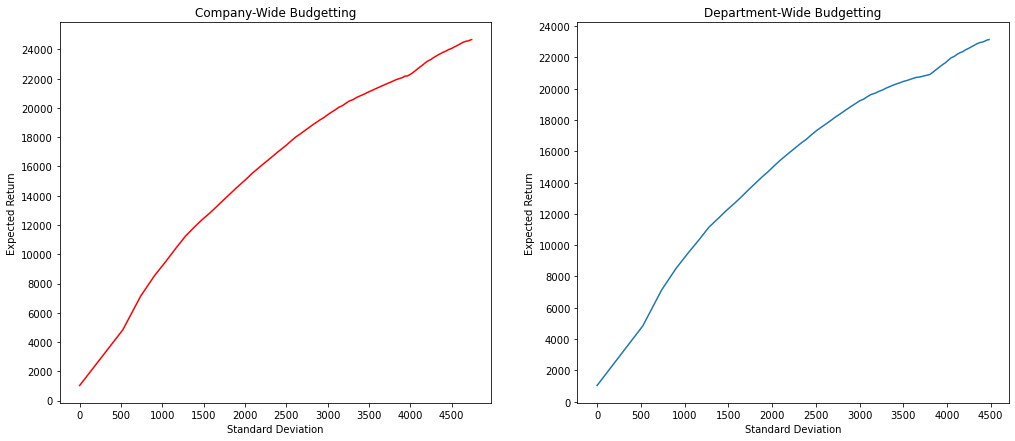

In [15]:
# Plot efficient frontier
plt.figure(figsize = (17,7))
plt.subplot(121)
plt.plot("CW_stdDev", "CW_return", data = CW_df, color = 'red')
plt.xlabel("Standard Deviation")
plt.ylabel("Expected Return")
plt.title("Company-Wide Budgetting")
plt.xticks(np.arange(0, 4800, step=500)) 
plt.yticks(np.arange(0, 26000, step=2000)) 

plt.subplot(122)
plt.plot("DW_stdDev", "DW_return", data = DW_df)
plt.xlabel("Standard Deviation")
plt.ylabel("Expected Return")
plt.title("Department-Wide Budgetting")
plt.xticks(np.arange(0, 4800, step=500)) 
plt.yticks(np.arange(0, 26000, step=2000))

plt.show()

In [16]:
# Check the differences in returns and risks between the two models
# subtracting Department-Wide model from Company-Wide model 
return_diff = pd.DataFrame(CW_df["CW_return"]-DW_df["DW_return"], columns = ["return_diff"])
stdDev_diff = pd.DataFrame(CW_df["CW_stdDev"]-DW_df["DW_stdDev"], columns = ["stdDev_diff"])
diff_df = pd.concat([CW_df, DW_df,return_diff, stdDev_diff], axis = 1)
diff_df

,CW_return,CW_stdDev,DW_return,DW_stdDev,return_diff,stdDev_diff
0,1030.000,0.000,1030.000,0.000,0.000,0.000
1,4840.610,522.670,4840.610,522.670,0.000,0.000
2,7137.641,737.895,7137.641,737.895,0.000,0.000
3,8522.796,903.597,8522.796,903.597,0.000,0.000
4,9529.418,1045.013,9529.418,1045.013,0.000,0.000
5,10433.643,1166.710,10365.220,1168.382,68.423,-1.672
6,11239.796,1280.250,11145.476,1277.815,94.320,2.435
7,11832.162,1383.182,11701.058,1382.789,131.104,0.393
8,12341.065,1476.366,12221.592,1478.662,119.473,-2.296
9,12785.568,1568.080,12663.999,1568.332,121.569,-0.252


### Differences between the efficient frontier charts of the two models
* the EF charts have highly similar trend and patterns over the two models
* Company-Wide budget model can afford to take more risks earning more corresponding returns. In detail, when posing the same variance constraints, the department-wide budget model stops taking risks at the 75th constraint with 4480 stdDev and 23142 returns, whereas the company-wide budget model keeps taking risks with more returns and stops at the 84th constraint with 4742 stdDev and 24675 returns.  
* according to the diff_df, from the 6th constraint, the CW budget model always makes higher returns taking bigger or smaller risks than the DW budget model within the same range of variance constraints.
* the CW budget model tends to make increasingly higher returns as the variance constraint becomes looser.